# Etude de la base de données OpenSARShip

Dans ce Notebook, il s'agira d'étudier la base de données OpenSARShip, allant de l'extraction des données à l'analyse de celles-ci. On comptera notamment le nombre de bateaux, le nombre de bateaux par type, lessous-types également. 

## Importation des différentes bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from PIL import Image
import xml.etree.ElementTree as ET

### Lecture d'une image

In [2]:
chemin_image = os.path.join(os.path.dirname(os.getcwd()), 'OpenSARShip', 'S1A_IW_GRDH_1SDV_20150823T221233_20150823T221258_007396_00A2CA_54D0', 'Patch_Uint8', 'Visual_Cargo_x1601_y7784_vh.tif')

In [3]:
# Affichage de l'image
image = Image.open(chemin_image)
largeur, hauteur = image.size
print(f"Dimensions de l'image : {largeur}x{hauteur}")
image.show()

Dimensions de l'image : 65x65


## Etude de la base de données

In [4]:
# Récupération des images dans tous les dossiers
chemin = os.path.join(os.path.dirname(os.getcwd()), 'OpenSARShip')
liste_dossiers = os.listdir(chemin)
print(liste_dossiers)
print(len(liste_dossiers))

['S1A_IW_GRDH_1SDV_20150823T221233_20150823T221258_007396_00A2CA_54D0', 'S1A_IW_GRDH_1SDV_20150916T221233_20150916T221258_007746_00AC44_BA63', 'S1A_IW_GRDH_1SDV_20150928T221239_20150928T221304_007921_00B100_32A3', 'S1A_IW_GRDH_1SDV_20151010T221234_20151010T221259_008096_00B5A1_5C25', 'S1A_IW_GRDH_1SDV_20160102T221226_20160102T221251_009321_00D788_F5BA', 'S1A_IW_GRDH_1SDV_20160114T221226_20160114T221251_009496_00DC88_46B2', 'S1A_IW_GRDH_1SDV_20160126T221225_20160126T221250_009671_00E1AF_228F', 'S1A_IW_GRDH_1SDV_20160219T221225_20160219T221250_010021_00EBE1_C9D5', 'S1A_IW_GRDH_1SDV_20160302T221225_20160302T221250_010196_00F0D2_D0C8', 'S1A_IW_GRDH_1SDV_20160326T221226_20160326T221251_010546_00FAC9_4D44', 'S1A_IW_GRDH_1SDV_20160328T095421_20160328T095446_010568_00FB64_215C', 'S1A_IW_GRDH_1SDV_20160405T102459_20160405T102528_010685_00FED5_97D5', 'S1A_IW_GRDH_1SDV_20160407T221226_20160407T221251_010721_00FFEA_ADBD', 'S1A_IW_GRDH_1SDV_20160419T221227_20160419T221252_010896_01052F_69E2', 'S1A_

In [5]:
liste_images= []
for dossier in liste_dossiers:
    for image in os.listdir(os.path.join(chemin, dossier, 'Patch_Uint8')):
        liste_images.append(os.path.join(chemin, dossier, 'Patch_Uint8', image))
print(len(liste_images))

11346


On retrouve bien 11346 images SAR, en format Uint8.

In [6]:
# Taille des images
liste_taille = []
for image in liste_images:
    liste_taille.append(Image.open(image).size)
print(liste_taille)

[(77, 77), (77, 77), (65, 65), (65, 65), (53, 53), (53, 53), (65, 65), (65, 65), (85, 85), (85, 85), (61, 61), (61, 61), (69, 69), (69, 69), (73, 73), (73, 73), (77, 77), (77, 77), (77, 77), (77, 77), (65, 65), (65, 65), (53, 53), (53, 53), (65, 65), (65, 65), (49, 49), (49, 49), (65, 65), (65, 65), (65, 65), (65, 65), (61, 61), (61, 61), (69, 69), (69, 69), (53, 53), (53, 53), (61, 61), (61, 61), (61, 61), (61, 61), (53, 53), (53, 53), (45, 45), (45, 45), (53, 53), (53, 53), (73, 73), (73, 73), (61, 61), (61, 61), (49, 49), (49, 49), (29, 29), (29, 29), (49, 49), (49, 49), (73, 73), (73, 73), (33, 33), (33, 33), (41, 41), (41, 41), (37, 37), (37, 37), (41, 41), (41, 41), (33, 33), (33, 33), (49, 49), (49, 49), (37, 37), (37, 37), (45, 45), (45, 45), (25, 25), (25, 25), (41, 41), (41, 41), (45, 45), (45, 45), (33, 33), (33, 33), (61, 61), (61, 61), (53, 53), (53, 53), (53, 53), (53, 53), (57, 57), (57, 57), (45, 45), (45, 45), (57, 57), (57, 57), (61, 61), (61, 61), (41, 41), (41, 41),

Les images n'ont pas toutes la même taille, il faudra donc les redimensionner.

In [7]:
# Calcul de la meilleure taille
taille_min = min(liste_taille)
taille_max = max(liste_taille)
print(taille_min)
print(taille_max)

(9, 9)
(445, 445)


In [8]:
# Optimisation de la taille des images par calcul de la médiane de la longueur
liste_longueur = []
for taille in liste_taille:
    liste_longueur.append(taille[0])
print(liste_longueur)

# tri des longueurs par ordre croissant
liste_longueur.sort()
print(liste_longueur)

# Calcul de la médiane
mediane = liste_longueur[len(liste_longueur)//2]
print(mediane)

# Calcul de la moyenne
moyenne = sum(liste_longueur)/len(liste_longueur)
print(moyenne)

# Calcul de l'écart-type
ecart_type = np.std(liste_longueur)
print(ecart_type)

# Calcul de la variance
variance = np.var(liste_longueur)
print(variance)



[77, 77, 65, 65, 53, 53, 65, 65, 85, 85, 61, 61, 69, 69, 73, 73, 77, 77, 77, 77, 65, 65, 53, 53, 65, 65, 49, 49, 65, 65, 65, 65, 61, 61, 69, 69, 53, 53, 61, 61, 61, 61, 53, 53, 45, 45, 53, 53, 73, 73, 61, 61, 49, 49, 29, 29, 49, 49, 73, 73, 33, 33, 41, 41, 37, 37, 41, 41, 33, 33, 49, 49, 37, 37, 45, 45, 25, 25, 41, 41, 45, 45, 33, 33, 61, 61, 53, 53, 53, 53, 57, 57, 45, 45, 57, 57, 61, 61, 41, 41, 21, 21, 49, 49, 37, 37, 41, 41, 57, 57, 45, 45, 37, 37, 45, 45, 85, 85, 65, 65, 45, 45, 61, 61, 33, 33, 97, 97, 45, 45, 65, 65, 37, 37, 45, 45, 73, 73, 101, 101, 97, 97, 41, 41, 33, 33, 41, 41, 37, 37, 41, 41, 37, 37, 29, 29, 53, 53, 69, 69, 69, 69, 33, 33, 25, 25, 89, 89, 101, 101, 113, 113, 21, 21, 77, 77, 73, 73, 105, 105, 69, 69, 77, 77, 81, 81, 61, 61, 65, 65, 57, 57, 41, 41, 37, 37, 41, 41, 61, 61, 29, 29, 33, 33, 33, 33, 45, 45, 33, 33, 89, 89, 45, 45, 37, 37, 53, 53, 33, 33, 45, 45, 33, 33, 29, 29, 33, 33, 33, 33, 37, 37, 21, 21, 25, 25, 29, 29, 45, 45, 25, 25, 45, 45, 29, 29, 21, 21,

Text(0.5, 1.0, 'Distribution of the length of the images')

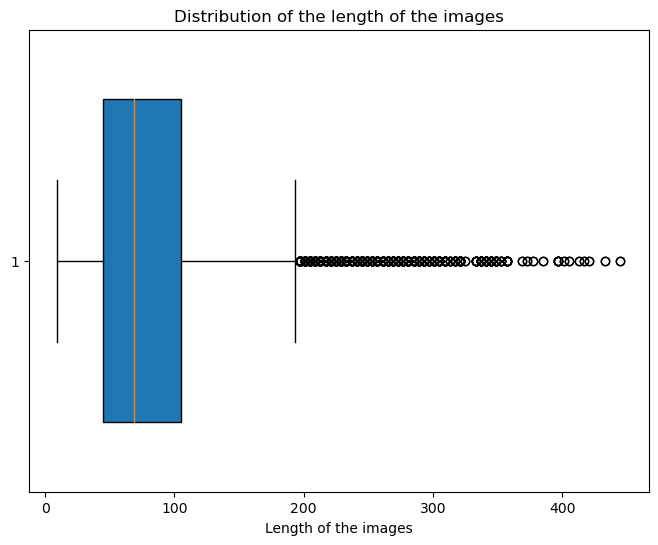

In [9]:
# Création d'un boxplot pour visualiser la distribution des longueurs
plt.figure(figsize=(8, 6))
plt.boxplot(liste_longueur, vert=False, widths=0.7, patch_artist=True)

# Ajout de labels
plt.xlabel('Length of the images')
plt.title('Distribution of the length of the images')

Au regard des calculs de médiane et de variance de la taille des images, on choisit de travailler sur des images de taille 96x96.

## Resize des images

In [10]:
# Pour toutes les images de la liste, on les redimensionne avec une taille donnée en paramètre
def resize_images(liste_images, taille):
    liste_images_resize = []
    for image in liste_images:
        liste_images_resize.append(Image.open(image).resize(taille))
    return liste_images_resize

# On redimensionne toutes les images avec la taille médiane
liste_images_resize = resize_images(liste_images, (96, 96))

In [11]:
print(len(liste_images_resize))
print(liste_images_resize[0].size)

11346
(96, 96)


## Etude des catégories des images

In [12]:
# On étudie les catégories des images
# Chaque image possède un nom de la forme Visual_NNN_xHHH_yVVV_pp.png, avec NNN le nom de la 
# catégorie, HHH le numéro de la colonne et VVV le numéro de la ligne
# On récupère les catégories dans une liste
liste_categories = []
for image in liste_images:
    liste_categories.append(image.split('_')[-4])
print(liste_categories)
print(len(liste_categories))

['Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Carg

In [13]:
nombre_images_par_categorie = {}
image_par_categorie = {}
for categorie in liste_categories:
    image_par_categorie[categorie] = 0
for image in liste_images:
    image_par_categorie[image.split('_')[-4]] += 1

print(image_par_categorie)
print(len(image_par_categorie))


{'Cargo': 8240, 'Tanker': 1670, 'Other Type': 942, 'Tug': 176, 'Fishing': 126, 'Search': 24, 'Passenger': 38, 'Dredging': 80, 'Pilot Vessel': 14, 'Port Tender': 8, 'Wing in ground': 6, 'High speed craft': 2, 'Law Enforcement': 12, 'Towing': 4, 'Diving ops': 2, 'Pleasure Craft': 2}
16


In [14]:
# # Création d'un dossier pour chaque catégorie
# for categorie in image_par_categorie.keys():
#     os.mkdir(os.path.join(chemin, categorie))

In [15]:
# # Copie des images dans les dossiers correspondants
# for image in liste_images:
#     categorie = image.split('_')[-4]
#     image_name = image.split('\\')[-1]
#     image_path = os.path.join(chemin, categorie, image_name)
#     with open(image_path, 'wb') as f:
#         f.write(open(image, 'rb').read())

Problème : il faut combiner les données du nom des images avec les données du fichier ship.xml. Other Type peut être un bateau d'une catégorie déjà existante.

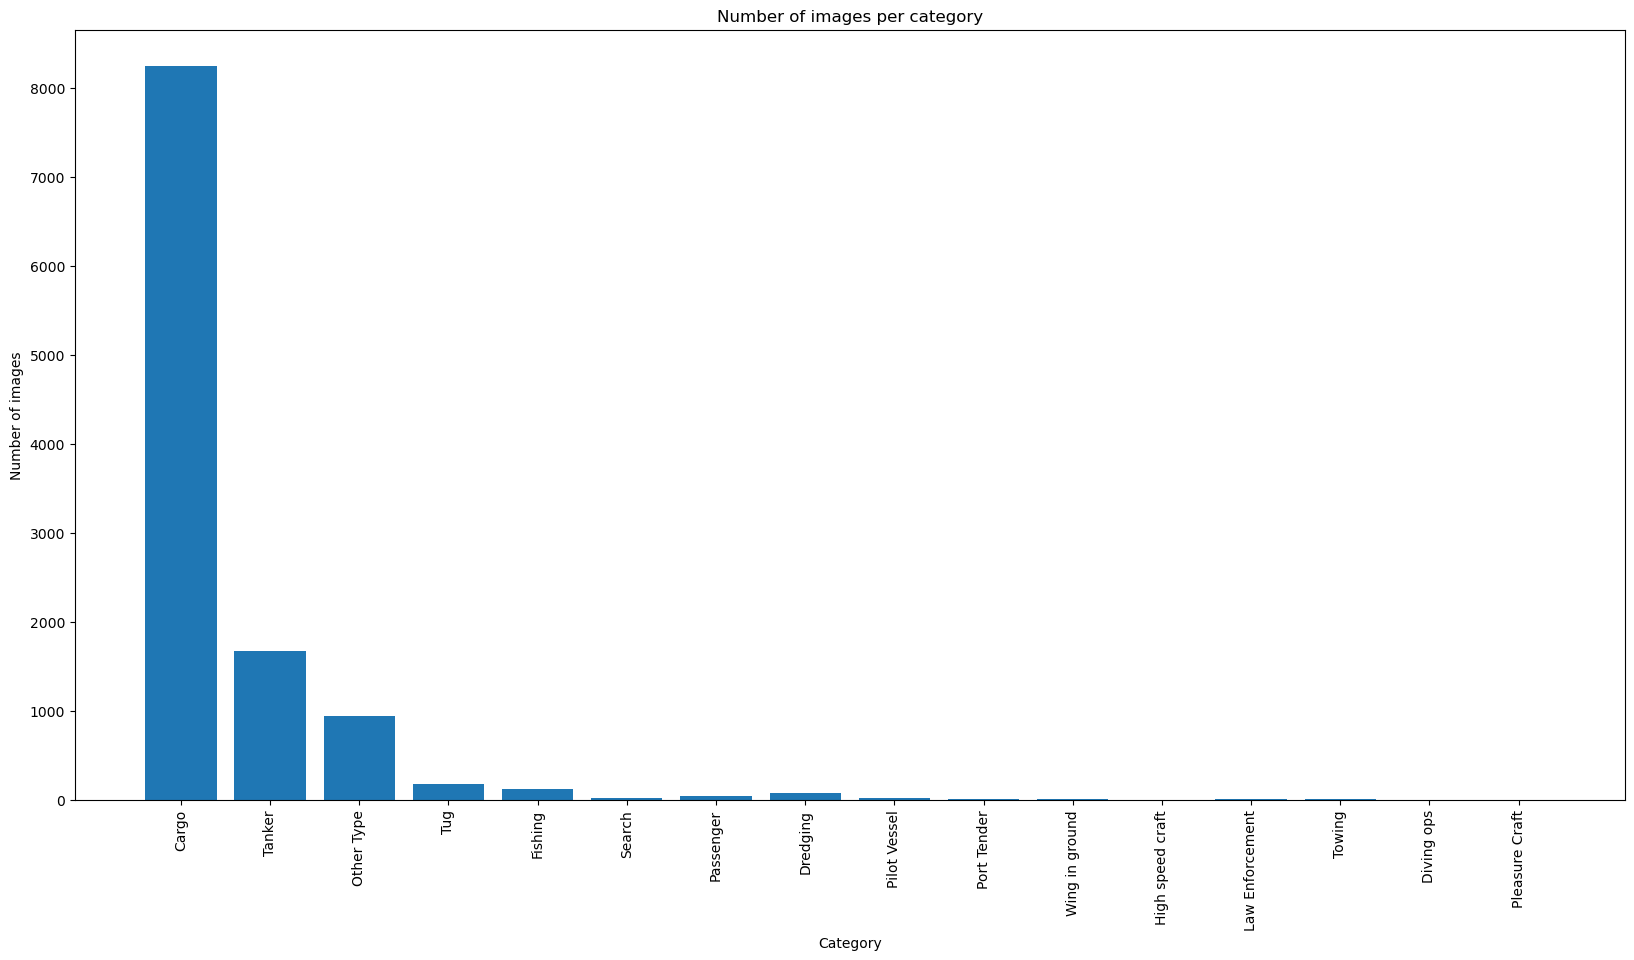

In [16]:
# Plot des résultats dans un graphe
plt.figure(figsize=(20, 10))
plt.bar(image_par_categorie.keys(), image_par_categorie.values())
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of images")
plt.title("Number of images per category")
plt.show()

## Catégories des bateaux dans le fichier ship_reformated.xml

In [22]:
# Function to count occurrences of ships in each category
def count_ships_per_category(xml_file):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Dictionary to store the count of ships per category
    ship_counts = {}

    # Iterate through each ship element
    for ship_element in root.findall('ship'):
        # Extract the category (Elaborated_type)
        category = ship_element.find('Elaborated_type').text

        # Increment the count for this category
        if category in ship_counts:
            ship_counts[category] += 1
        else:
            ship_counts[category] = 1

    return ship_counts

from collections import Counter
# Chemin vers le dossier contenant les données OpenSARShip
chemin = os.path.join(os.path.dirname(os.getcwd()), "OpenSARShip")

# Initialiser un compteur pour les catégories de navires
categories_compteur = Counter()
# Initialiser un compteur pour les navires catégorisés
navires_categorises = 0

# Fonction pour lire les types de navires dans un fichier Ship_reformated.xml et les compter
def compter_types_navires(fichier_xml):
    global navires_categorises
    tree = ET.parse(fichier_xml)
    root = tree.getroot()
    for ship in root.findall('ship'):
        elaborated_type = ship.find('Elaborated_type').text
        if elaborated_type:
            categories_compteur[elaborated_type] += 1
            navires_categorises += 1  # Incrémenter pour chaque navire catégorisé

# Parcourir chaque sous-dossier pour trouver et lire les fichiers Ship_reformated.xml
for sous_dossier in os.listdir(chemin):
    sous_chemin = os.path.join(chemin, sous_dossier)
    if os.path.isdir(sous_chemin):
        fichier_xml = os.path.join(sous_chemin, 'Ship_reformated.xml')
        if os.path.isfile(fichier_xml):
            compter_types_navires(fichier_xml)

# Afficher les résultats
print("Nombre d'occurrences par catégorie de navires :")
for categorie, nombre in categories_compteur.items():
    print(f"{categorie}: {nombre}")
print(f"Nombre total de navires catégorisés : {navires_categorises}")

Nombre d'occurrences par catégorie de navires :
Bulk Carrier: 1149
Oil/Chemical Tanker: 163
General Cargo: 263
Tanker: 431
Cargo: 1835
Vehicles Carrier: 41
Tug/Supply Vessel: 17
Unspecified: 99
Fishing: 160
Container Ship: 791
Crude Oil Tanker: 22
Ore Carrier: 44
Heavy Lift Vessel: 9
Cargo/Containership: 6
LPG Tanker: 54
Oil Products Tanker: 116
Other: 63
Tug: 31
Multi Purpose Offshore Vessel: 55
Dredger: 42
Timber Carrier: 5
Chemical Tanker: 38
Fire Fighting Vessel: 8
Tanker - Hazard C (Minor): 8
Passenger: 13
Offshore Supply Ship: 34
Heavy Load Carrier: 3
Cargo - Hazard D (Recognizable): 3
Beacon, Cardinal W: 1
Tanker - Hazard B: 14
Wing In Grnd: 5
Cargo - Hazard A (Major): 14
Port Tender: 4
Tanker - Hazard A (Major): 17
Pilot Vessel: 4
Law Enforce: 5
Trailing Suction Dredger: 2
Trailing Suction Hopper Dredger: 14
Motor Hopper: 3
Asphalt/Bitumen Tanker: 5
Deck Cargo Ship: 2
Wood Chips Carrier: 4
Salvage/Rescue Vessel: 6
Passengers Ship: 10
Bunkering Tanker: 2
Cargo Barge: 2
Cement Ca

On va s'intéresser à certaines catégories de bateaux, notamment les catégories les plus représentées.
Voici les bateaux que l'on va étudier :
- General Cargo (263)
- Bulk Carrier (1149)
- Container Ship (791)
- Cargo (1835)

Dans un second temps, on pourra s'intéresser aux catégories suivantes :
- Tanker (431)
- Fishing (160)

## Relier les images VV et HH aux catégories de bateaux dans le fichier ship_reformated.xml

In [24]:
# # Création de 6 dossiers pour les 6 catégories de navires :
# # Cargo, GenralCargo, BulkCarrier, Tanker, Fishing, ContainerShip

# # Define the root directory where the folders will be created
# root_directory = os.path.dirname(os.path.join(os.path.dirname(os.getcwd()), "OpenSARShip"))

# # List of folder names to create
# folders = ["Cargo", "GeneralCargo", "BulkCarrier", "Tanker", "Fishing", "ContainerShip"]

# # Loop through each folder name and create it if it doesn't exist
# for folder in folders:
#     # Construct the full path for the folder
#     folder_path = os.path.join(root_directory, folder)
    
#     # Check if the folder already exists
#     if not os.path.exists(folder_path):
#         # Create the folder
#         os.makedirs(folder_path)
#         print(f"Folder '{folder}' created.")
#     else:
#         print(f"Folder '{folder}' already exists.")

Folder 'Cargo' created.
Folder 'GeneralCargo' created.
Folder 'BulkCarrier' created.
Folder 'Tanker' created.
Folder 'Fishing' created.
Folder 'ContainerShip' created.


Run this code below just one time to create the folders for the images of the different categories of ships.

In [27]:
import os
import xml.etree.ElementTree as ET
import shutil

# Define the path to the folder containing the ship reformated XML files and the image files
root_directory = os.path.join(os.path.dirname(os.getcwd()), "OpenSARShip")
categories_directory = os.path.join(root_directory, "Categories")

# Function to read ship categories and coordinates from the XML files
def read_ships_info(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    ships_info = []
    for ship in root.findall('.//ship'):
        center_x = ship.find('Center_x').text
        center_y = ship.find('Center_y').text
        category = ship.find('Elaborated_type').text
        ships_info.append((center_x, center_y, category))
    return ships_info

# Function to copy images to their corresponding category folders based on coordinates
def copy_images_to_categories(ship_info, images_path):
    for image in os.listdir(images_path):
        if image.endswith('.tif'):
            # Extract coordinates from image filename
            _, _, x_coord, y_coord, _ = image.split('_')
            y_coord = y_coord.split('.')[0]  # Remove file extension
            for center_x, center_y, category in ship_info:
                if x_coord[1:] == center_x and y_coord[1:] == center_y:
                    src_path = os.path.join(images_path, image)
                    category_folder = os.path.join(categories_directory, category)
                    if not os.path.exists(category_folder):
                        os.makedirs(category_folder)
                    dest_path = os.path.join(category_folder, image)
                    shutil.copy(src_path, dest_path)
                    print(f"Copied {image} to {category_folder}")
                    break

# Iterate over all folders in the root directory to find Ship_reformated.xml and corresponding images
for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)
    if os.path.isdir(folder_path):
        xml_file_path = os.path.join(folder_path, "Ship_reformated.xml")
        images_folder_path = os.path.join(folder_path, "Patch_Uint8")
        if os.path.isfile(xml_file_path) and os.path.exists(images_folder_path):
            ships_info = read_ships_info(xml_file_path)
            copy_images_to_categories(ships_info, images_folder_path)

Copied Visual_Cargo_x10661_y11170_vh.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\General Cargo
Copied Visual_Cargo_x10661_y11170_vv.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\General Cargo
Copied Visual_Cargo_x11134_y10143_vh.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\Cargo
Copied Visual_Cargo_x11134_y10143_vv.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\Cargo
Copied Visual_Cargo_x11505_y10248_vh.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\Vehicles Carrier
Copied Visual_Cargo_x11505_y10248_vv.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\Vehicles Carrier
Copied Visual_Cargo_x1601_y7784_vh.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\Bulk Carrier
Copied Visual_Cargo_x1601_y7784_vv.tif to c:\Users\Julia Fouchier\Projet_syteme_3A\OpenSARShip\Categories\Bulk Carrier
Copied Visual_Cargo_x1673_y6973_vh.tif t

In [28]:
# Count the number of images in each category folder
category_counts = {}
for category in os.listdir(categories_directory):
    category_path = os.path.join(categories_directory, category)
    if os.path.isdir(category_path):
        category_counts[category] = len(os.listdir(category_path))

# Display the number of images in each category
print("Number of images in each category folder:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Number of images in each category folder:
Aggregates Carrier: 2
Anti-Pollution: 2
Asphalt: 1
Beacon, Cardinal W: 2
Bulk Carrier: 2298
Bulker: 2
Bunkering Tanker: 4
Cable Layer: 6
Cargo: 3670
Cargo - Hazard A (Major): 28
Cargo - Hazard C (Minor): 2
Cargo - Hazard D (Recognizable): 6
Cargo Barge: 4
Cement Carrier: 20
Chemical Tanker: 76
Container Ship: 1582
Containership: 12
Crude Oil Tanker: 44
Deck Cargo Ship: 4
Dredger: 84
Fire Fighting Vessel: 16
Fishing: 318
General Cargo: 526
Heavy Lift Vessel: 18
Heavy Load Carrier: 6
High Speed Craft: 2
Law Enforce: 10
LNG Tanker: 4
LPG Tanker: 108
Motor Hopper: 6
Multi Purpose Offshore Vessel: 110
NaN: 2
Offshore Supply Ship: 68
Oil: 1
Oil Products Tanker: 232
Ore Carrier: 88
Other: 126
Passenger: 26
Passengers Ship: 20
Patrol Vessel: 6
Pilot Vessel: 8
Pipelay Crane Vessel: 6
Pleasure Craft: 6
Port Tender: 8
Reefer: 8
Research: 1
Reserved: 4
Ro-Ro Cargo: 8
Salvage: 1
SAR Aircraft: 2
Standby Safety Vessel: 6
Supply Vessel: 2
Tanker: 862
Tanker - 

A présent, nous avons les images de bateaux classées par catégories. Nous pouvons afficher leur nombre dans un graphe.

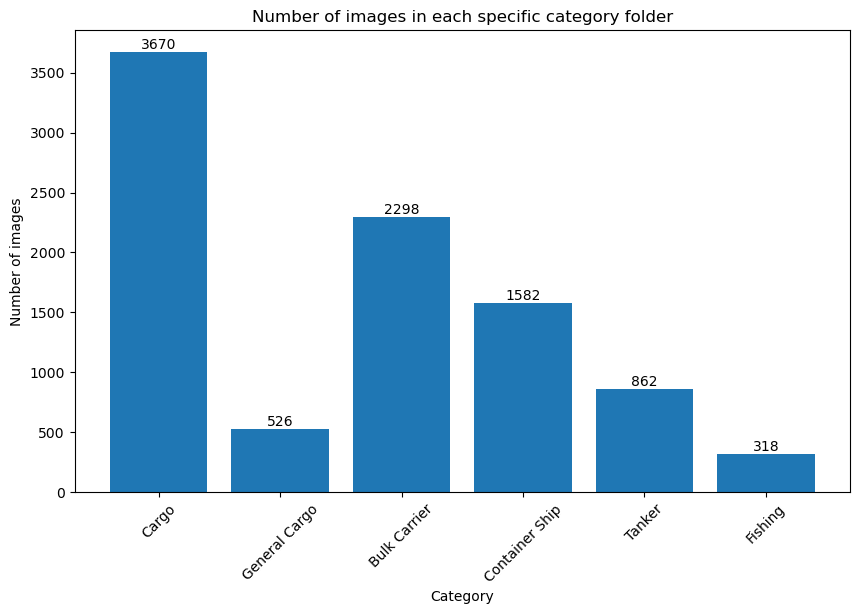

In [33]:
# Plot the number of images in 6 categories : Cargo, General Cargo, Bulk Carrier, Tanker, Fishing, Container Ship
specific_categories = ["Cargo", "General Cargo", "Bulk Carrier", "Container Ship", "Tanker", "Fishing"]
plt.figure(figsize=(10, 6))
plt.bar(specific_categories, [category_counts[category] for category in specific_categories])
plt.xlabel("Category")
plt.ylabel("Number of images")
plt.title("Number of images in each specific category folder")
# Add the count of images on top of each bar
for i, count in enumerate([category_counts[category] for category in specific_categories]):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()